# Analisis de datos Performance Piscina

<span style="color: green; font-size: 18px">
    Importacion de librerias
</span>

In [1]:
import pandas as pd

In [2]:
from scipy.stats import pearsonr
from datetime import datetime, timedelta

#### Lectura de dataset

<span style="color: yellow; font-size: 16px">
    Actualizar siempre al ultimo dataset actualizado
</span>

In [3]:
data = pd.read_excel(
    "/home/studio-lab-user/Swimming Data Analysis/Data/natacion_20230201.xlsx",
    parse_dates=["Fecha"])

<span style="color: green; font-size: 18px">
    Visualizacion de algunas de las propiedades importantes del DataFrame
</span>

In [4]:
print('Columnas ', data.columns)
print('Index ', data.index)
print('Dimensiones ', data.shape)

Columnas  Index(['Unnamed: 0', 'Fecha', 'Hora_inicio', 'Hora_de_finalización',
       'Duración_sesion', 'Tipo_entrenamiento', 'Objetivos', 'Metas',
       'Metros_piscina', 'Metros_totales', 'Cantidad_de_brazadas',
       'Frecuencia_cardíaca', 'Calorías_quemadas', 'Tiempo_estilo_espalda',
       'Metros_estilo_espalda', 'Repeticiones_estilo_espalda',
       'Tiempo_estilo_pecho', 'Metros_estilo_pecho',
       'Repeticiones_estilo_pecho', 'Tiempo_estilo_crawl',
       'Metros_estilo_crawl', 'Repeticiones_estilo_crawl',
       'Descanso_entre_series', 'Ritmo_promedio', 'Vueltas',
       'Tiempo_ingesta_previa', 'Ingesta_descripcion', 'Suplemento_dietario',
       'Ejercicios_previos', 'Tiempo_ejercicios_previos',
       'Sensaciones_entrenamiento'],
      dtype='object')
Index  RangeIndex(start=0, stop=9, step=1)
Dimensiones  (9, 31)


In [5]:
data = data.drop("Unnamed: 0", axis=1)

<span style="color: green; font-size: 18px">
    Visualizacion de los primeros 5 valores del dataFrame a partir del metodo .head
</span>


data.head() es un método en pandas que devuelve las primeras 5 filas de un DataFrame por defecto. Se puede especificar un número diferente de filas a devolver, como data.head(10) para devolver las primeras 10 filas.

In [6]:
data.head()

,Fecha,Hora_inicio,Hora_de_finalización,Duración_sesion,Tipo_entrenamiento,Objetivos,Metas,Metros_piscina,Metros_totales,Cantidad_de_brazadas,...,Repeticiones_estilo_crawl,Descanso_entre_series,Ritmo_promedio,Vueltas,Tiempo_ingesta_previa,Ingesta_descripcion,Suplemento_dietario,Ejercicios_previos,Tiempo_ejercicios_previos,Sensaciones_entrenamiento
0,2023-02-01,09:00:00,10:15:50,01:15:50,Estilos,Mejorar Tecnica,Mejorar rendimiento,20,1920,1382,...,5.0,00:00:00,3.60,96,00:40:00,"Cafe, pan, clara huevo",Creatina,Caminata,00:00:10,Muy buenas
1,2023-01-30,09:05:00,10:05:00,01:01:11,Series,Mejorar Tecnica,Mejorar rendimiento,20,1420,980,...,4.0,00:00:30,4.20,71,01:00:00,"Leche con coco, pan",Creatina,Caminata,00:00:15,Muy buenas
2,2023-01-27,11:04:00,NaN,00:55:18,Estilos,Mejorar Tecnica,Mejorar crawl,20,1420,890,...,4.0,00:00:45,3.54,71,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Muy buenas
3,2023-01-25,08:50:00,09:50:00,01:01:11,Estilos,Mejorar Tecnica,Mejorar crawl,20,1340,818,...,3.0,00:01:00,4.34,67,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas
4,2023-01-23,21:06:00,NaN,00:37:45,Series,Mejorar Tecnica,Aumentar distancia,20,780,506,...,2.0,00:01:30,4.50,39,01:00:00,"Cafe, banana",Creatina,Caminata,00:00:10,Buenas


<span style="color: green; font-size: 18px">
    Metodo .info
</span>

data.info() es un metodo en pandas que muestra información sobre un DataFrame, incluyendo el nombre de las columnas, el número de no nulos, el tipo de datos, y el uso de memoria. Este método es útil para tener una visión rápida de la estructura de los datos y detectar posibles problemas, como valores faltantes o tipos de datos inconsistentes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Fecha                        8 non-null      datetime64[ns]
 1   Hora_inicio                  8 non-null      object        
 2   Hora_de_finalización         2 non-null      object        
 3   Duración_sesion              8 non-null      object        
 4   Tipo_entrenamiento           8 non-null      object        
 5   Objetivos                    8 non-null      object        
 6   Metas                        6 non-null      object        
 7   Metros_piscina               8 non-null      int64         
 8   Metros_totales               8 non-null      int64         
 9   Cantidad_de_brazadas         8 non-null      int64         
 10  Frecuencia_cardíaca          8 non-null      int64         
 11  Calorías_quemadas            8 non-null      int6

<span style="color: cyan; font-size: 18px">
    Valores perdidos
</span>

Obtener el numero de datos perdidos por columnas

In [7]:
missing_values_count = data.isnull().sum()

Visualizar los datos perdidos en el rango de columnas indicado

In [8]:
missing_values_count[0:29]

Fecha                          0
Hora_inicio                    0
Hora_de_finalización           6
Duración_sesion                0
Tipo_entrenamiento             0
Objetivos                      0
Metas                          2
Metros_piscina                 0
Metros_totales                 0
Cantidad_de_brazadas           0
Frecuencia_cardíaca            0
Calorías_quemadas              0
Tiempo_estilo_espalda          1
Metros_estilo_espalda          1
Repeticiones_estilo_espalda    1
Tiempo_estilo_pecho            1
Metros_estilo_pecho            1
Repeticiones_estilo_pecho      1
Tiempo_estilo_crawl            1
Metros_estilo_crawl            2
Repeticiones_estilo_crawl      1
Descanso_entre_series          0
Ritmo_promedio                 0
Vueltas                        0
Tiempo_ingesta_previa          0
Ingesta_descripcion            0
Suplemento_dietario            0
Ejercicios_previos             0
Tiempo_ejercicios_previos      0
dtype: int64

<span style="color: green; font-size: 18px">
    Metodo .describe()
</span>

data.describe() es un método de Pandas que calcula y muestra estadísticos básicos para cada columna numérica del DataFrame. Los estadísticos incluidos son la cuenta, la media, la desviación estándar, el mínimo, el 25%, el 50% (mediana), el 75% y el máximo. Estos estadísticos brindan una buena visión general de la distribución de los datos en una columna.

In [9]:
data.describe()

,Metros_piscina,Metros_totales,Cantidad_de_brazadas,Frecuencia_cardíaca,Calorías_quemadas,Metros_estilo_espalda,Repeticiones_estilo_espalda,Metros_estilo_pecho,Repeticiones_estilo_pecho,Metros_estilo_crawl,Repeticiones_estilo_crawl,Ritmo_promedio,Vueltas
count,8.000000,8.000000,8.000000,8.000000,8.000000,7.0,7.000000,7.000000,7.000000,6.000000,7.000000,8.00000,8.000000
mean,18.125000,1042.500000,652.125000,130.625000,342.500000,360.0,3.857143,334.285714,2.428571,383.333333,2.714286,5.87750,52.125000
std,5.303301,408.962101,297.530521,8.087689,153.764198,100.0,0.377964,39.520941,0.534522,172.240142,0.951190,4.72668,20.448105
min,5.000000,240.000000,73.000000,116.000000,58.000000,260.0,3.000000,300.000000,2.000000,200.000000,2.000000,3.54000,12.000000
25%,20.000000,810.000000,493.250000,128.250000,245.500000,300.0,4.000000,300.000000,2.000000,300.000000,2.000000,4.17000,40.500000
50%,20.000000,1160.000000,740.500000,134.500000,391.000000,300.0,4.000000,320.000000,2.000000,300.000000,2.000000,4.30500,58.000000
75%,20.000000,1360.000000,846.500000,135.500000,448.500000,430.0,4.000000,360.000000,3.000000,525.000000,3.500000,4.51000,68.000000
max,20.000000,1420.000000,980.000000,137.000000,500.000000,500.0,4.000000,400.000000,3.000000,600.000000,4.000000,17.55000,71.000000


<span style="color: orange; font-size: 22px">
    Operaciones de manipulacion de datos
</span>

Si se quiere extraer una serie del DataFrame, es posible hacerlo de la misma forma en que se extrae un valor de un diccionario.

In [10]:
serie_entrenamiento = data['Tipo_entrenamiento']

In [11]:
type(serie_entrenamiento)

pandas.core.series.Series

In [12]:
print(serie_entrenamiento)

0     Series
1    Estilos
2    Estilos
3     Series
4     Series
5    Estilos
6     Series
7     Series
Name: Tipo_entrenamiento, dtype: object


<span style="color: orange; font-size: 18px">
    Mascara Booleana
</span>

Las máscaras booleanas en un dataframe se utilizan para filtrar y seleccionar filas o valores específicos dentro de un dataframe basándose en ciertos criterios. La máscara booleana es una matriz de valores booleanos (verdaderos o falsos) que indican si cada valor en el dataframe cumple con una determinada condición. Estos valores se pueden usar para indexar o filtrar filas o valores dentro del dataframe, permitiendo la selección de un subconjunto específico de datos.

In [13]:
data['Metros_totales'] >= 1000

0     True
1     True
2     True
3    False
4     True
5     True
6    False
7    False
Name: Metros_totales, dtype: bool

In [14]:
mascara_booleana = data['Metros_totales'] >= 1000

In [15]:
mascara_booleana.shape

(8,)

In [16]:
data['Metros_totales'].value_counts()

1420    2
1340    1
780     1
1100    1
1220    1
820     1
240     1
Name: Metros_totales, dtype: int64

<span style="color: orange; font-size: 18px">
    Analisis numerico
</span>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Fecha                        8 non-null      datetime64[ns]
 1   Hora_inicio                  8 non-null      object        
 2   Hora_de_finalización         2 non-null      object        
 3   Duración_sesion              8 non-null      object        
 4   Tipo_entrenamiento           8 non-null      object        
 5   Objetivos                    8 non-null      object        
 6   Metas                        6 non-null      object        
 7   Metros_piscina               8 non-null      int64         
 8   Metros_totales               8 non-null      int64         
 9   Cantidad_de_brazadas         8 non-null      int64         
 10  Frecuencia_cardíaca          8 non-null      int64         
 11  Calorías_quemadas            8 non-null      int6

In [20]:
data['Metros_estilo_espalda'].describe()

count      7.0
mean     360.0
std      100.0
min      260.0
25%      300.0
50%      300.0
75%      430.0
max      500.0
Name: Metros_estilo_espalda, dtype: float64

In [21]:
data['Metros_estilo_espalda'].median()

300.0

In [22]:
data['Metros_estilo_espalda'].describe()

count      7.0
mean     360.0
std      100.0
min      260.0
25%      300.0
50%      300.0
75%      430.0
max      500.0
Name: Metros_estilo_espalda, dtype: float64

In [23]:
data['Metros_estilo_pecho'].describe()

count      7.000000
mean     334.285714
std       39.520941
min      300.000000
25%      300.000000
50%      320.000000
75%      360.000000
max      400.000000
Name: Metros_estilo_pecho, dtype: float64

In [24]:
data['Metros_estilo_pecho'].median()

320.0

In [25]:
data['Metros_estilo_pecho'].describe()

count      7.000000
mean     334.285714
std       39.520941
min      300.000000
25%      300.000000
50%      320.000000
75%      360.000000
max      400.000000
Name: Metros_estilo_pecho, dtype: float64

In [27]:
data['Metros_estilo_crawl'].describe()

count      6.000000
mean     383.333333
std      172.240142
min      200.000000
25%      300.000000
50%      300.000000
75%      525.000000
max      600.000000
Name: Metros_estilo_crawl, dtype: float64

In [28]:
data['Metros_estilo_crawl'].median()

300.0

In [29]:
data['Tiempo_estilo_crawl'].describe()

count            7
unique           5
top       00:10:00
freq             2
Name: Tiempo_estilo_crawl, dtype: object

<span style="color: orange; font-size: 18px">
    Metodo .describe
</span>

'describe()' en pandas es utilizada para resumir los estadísticos básicos de una columna. En este caso, se aplica a la columna 'Tiempo Estilo Crawl' del dataframe.

Los estadísticos que se muestran son:

count: el número de valores no nulos en la columna
unique: el número de valores únicos en la columna
top: el valor más frecuente en la columna
freq: la frecuencia del valor más frecuente en la columna

En este caso, se puede ver que hay 4 valores no nulos en la columna 'Tiempo Estilo Crawl', 3 valores únicos, el valor más frecuente es '00:15:00' y aparece 2 veces.

<span style="color: magenta; font-size: 22px">
    Visualizacion
</span>

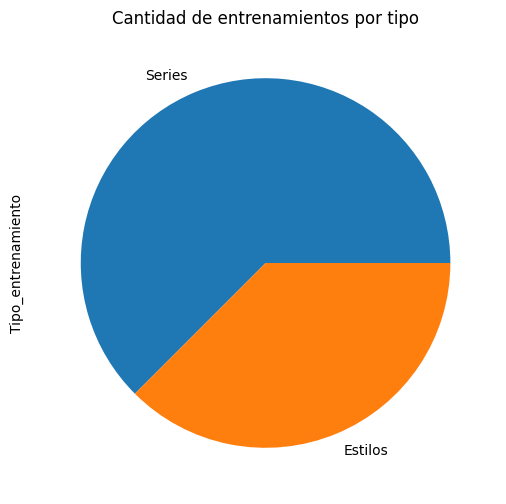

In [30]:
data['Tipo_entrenamiento'].value_counts().plot(kind='pie', figsize=(6,6))
plt.title('Cantidad de entrenamientos por tipo')
plt.show()

Visualizar una sesion especifica de entrenamiento

In [31]:
fecha = '2023-01-27'
df_fecha = data.loc[data['Fecha'] == fecha]

Crear un diccionario con los datos de tiempo por estilo

In [32]:
tiempos_por_estilo = {'Espalda': pd.to_timedelta(df_fecha['Tiempo_estilo_espalda']).sum(),
                    'Pecho': pd.to_timedelta(df_fecha['Tiempo_estilo_pecho']).sum(),
                    'Crawl': pd.to_timedelta(df_fecha['Tiempo_estilo_crawl']).sum()}

Filtra solo los valores no nulos

In [33]:
tiempos_por_estilo = {key: value for key, value in tiempos_por_estilo.items() if value.total_seconds() > 0}

Crear una lista con los tiempos y otra con los estilos

In [34]:
tiempos = list(tiempos_por_estilo.values())
estilos = list(tiempos_por_estilo.keys())

In [35]:
tiempos_en_minutos = [divmod(t.total_seconds(), 60) for t in tiempos] # Convertir los tiempos a minutos y segundos
etiquetas = [f'{estilo} - {minutos:02}m {segundos:02}s' for estilo, (minutos, segundos) in zip(estilos, tiempos_en_minutos)] # Crear las etiquetas con los estilos y los tiempos en minutos y segundos

La primera línea, "tiempos_en_minutos = [divmod(t.total_seconds() / 60, 60) for t in tiempos]" está creando una lista llamada "tiempos_en_minutos" utilizando una list comprehension. Dentro de esta list comprehension, se está utilizando el método "total_seconds()" en cada elemento de la lista "tiempos" para convertirlos a segundos, luego se divide por 60 para convertirlos a minutos. Luego, se utiliza la función "divmod" para dividir ese valor en minutos en minutos y segundos. El resultado final es una lista de tuplas con minutos y segundos para cada estilo.

La segunda línea, "etiquetas = [f'{estilo} - {minutos:.0f}m {segundos:.0f}s' for estilo, (minutos, segundos) in zip(estilos, tiempos_en_minutos)]", está creando una lista llamada "etiquetas" utilizando otra list comprehension. Dentro de esta list comprehension, se está utilizando la función "zip" para combinar los elementos de las listas "estilos" y "tiempos_en_minutos" en una tupla. Luego se utiliza una f-string para crear una etiqueta con el formato "estilo - minutos m segundos s" para cada tupla. El formato .0f indica que no se mostraran decimales en los valores de minutos y segundos.

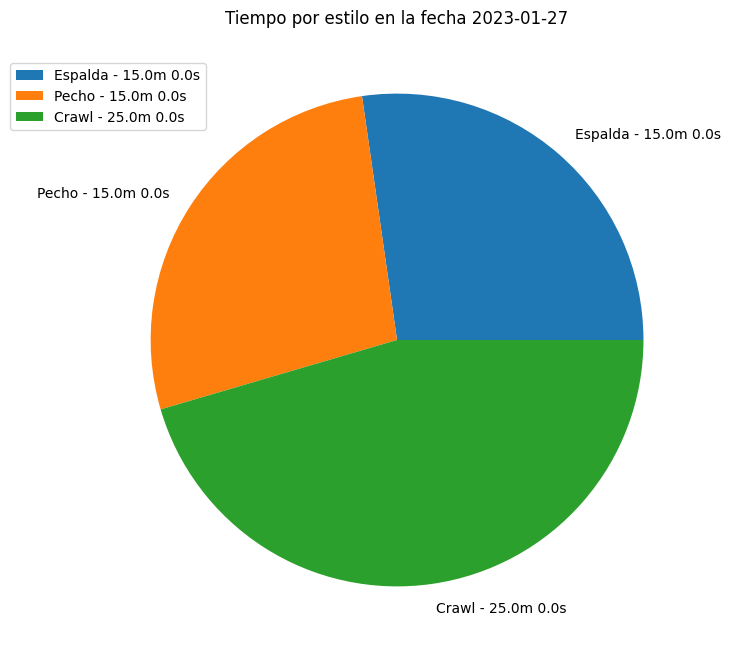

In [36]:
plt.figure(figsize=(8,8)) # establecer el tamaño del gráfico
plt.pie([minutos + segundos/60 for minutos, segundos in tiempos_en_minutos], labels=etiquetas) # crear el gráfico
# plt.legend(loc='upper left') # establecer la posición de las leyendas
plt.legend(bbox_to_anchor=(0.02, 0.85), loc="upper left", bbox_transform=plt.gcf().transFigure)
plt.title('Tiempo por estilo en la fecha ' + fecha) # establecer el título del gráfico
plt.show()

Relaciones entre columnas

Antes de establecer correlaciones, debemos asegurarnos de que los valores cargados de nuestro dataset son correlacionables, es decir que las variables sean del mismo tipo:

numericas con numericas, dado que si son categoricas y numericas deberemos realizar algunas operaciones para convertir nuestros valores.

In [37]:
print('Columnas ', data.columns)

Columnas  Index(['Fecha', 'Hora_inicio', 'Hora_de_finalización', 'Duración_sesion',
       'Tipo_entrenamiento', 'Objetivos', 'Metas', 'Metros_piscina',
       'Metros_totales', 'Cantidad_de_brazadas', 'Frecuencia_cardíaca',
       'Calorías_quemadas', 'Tiempo_estilo_espalda', 'Metros_estilo_espalda',
       'Repeticiones_estilo_espalda', 'Tiempo_estilo_pecho',
       'Metros_estilo_pecho', 'Repeticiones_estilo_pecho',
       'Tiempo_estilo_crawl', 'Metros_estilo_crawl',
       'Repeticiones_estilo_crawl', 'Descanso_entre_series', 'Ritmo_promedio',
       'Vueltas', 'Tiempo_ingesta_previa', 'Ingesta_descripcion',
       'Suplemento_dietario', 'Ejercicios_previos',
       'Tiempo_ejercicios_previos', 'Sensaciones_entrenamiento'],
      dtype='object')


In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Fecha                        8 non-null      datetime64[ns]
 1   Hora_inicio                  8 non-null      object        
 2   Hora_de_finalización         2 non-null      object        
 3   Duración_sesion              8 non-null      object        
 4   Tipo_entrenamiento           8 non-null      object        
 5   Objetivos                    8 non-null      object        
 6   Metas                        6 non-null      object        
 7   Metros_piscina               8 non-null      int64         
 8   Metros_totales               8 non-null      int64         
 9   Cantidad_de_brazadas         8 non-null      int64         
 10  Frecuencia_cardíaca          8 non-null      int64         
 11  Calorías_quemadas            8 non-null      int6

In [39]:
corr = data.corr()

corr

/tmp/ipykernel_1532/683390912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Metros_piscina,Metros_totales,Cantidad_de_brazadas,Frecuencia_cardíaca,Calorías_quemadas,Metros_estilo_espalda,Repeticiones_estilo_espalda,Metros_estilo_pecho,Repeticiones_estilo_pecho,Metros_estilo_crawl,Repeticiones_estilo_crawl,Ritmo_promedio,Vueltas
Metros_piscina,1.000000,0.792883,0.786480,0.730665,0.747608,NaN,NaN,NaN,NaN,NaN,NaN,-0.997826,0.792883
Metros_totales,0.792883,1.000000,0.989066,0.394227,0.950757,8.024411e-01,-2.995498e-01,0.035810,0.820778,0.582588,0.803446,-0.808570,1.000000
Cantidad_de_brazadas,0.786480,0.989066,1.000000,0.353197,0.975084,8.081299e-01,-1.847139e-01,0.059795,0.759437,0.593562,0.780136,-0.799343,0.989066
Frecuencia_cardíaca,0.730665,0.394227,0.353197,1.000000,0.386379,-6.371372e-01,1.267449e-01,0.147477,-0.634824,-0.607080,-0.663117,-0.728628,0.394227
Calorías_quemadas,0.747608,0.950757,0.975084,0.386379,1.000000,6.053009e-01,-7.138737e-02,0.192146,0.507612,0.295448,0.542140,-0.754132,0.950757
Metros_estilo_espalda,NaN,0.802441,0.808130,-0.637137,0.605301,1.000000e+00,-4.856458e-16,-0.387980,0.873053,0.964500,0.981227,-0.609210,0.802441
Repeticiones_estilo_espalda,NaN,-0.299550,-0.184714,0.126745,-0.071387,-4.856458e-16,1.000000e+00,-0.286910,-0.471405,0.237023,-0.132453,-0.170355,-0.299550
Metros_estilo_pecho,NaN,0.035810,0.059795,0.147477,0.192146,-3.879800e-01,-2.869095e-01,1.000000,-0.180334,-0.531967,-0.316684,0.072688,0.035810
Repeticiones_estilo_pecho,NaN,0.820778,0.759437,-0.634824,0.507612,8.730534e-01,-4.714045e-01,-0.180334,1.000000,0.741999,0.936586,-0.509634,0.820778
Metros_estilo_crawl,NaN,0.582588,0.593562,-0.607080,0.295448,9.644997e-01,2.370227e-01,-0.531967,0.741999,1.000000,0.925132,-0.705956,0.582588


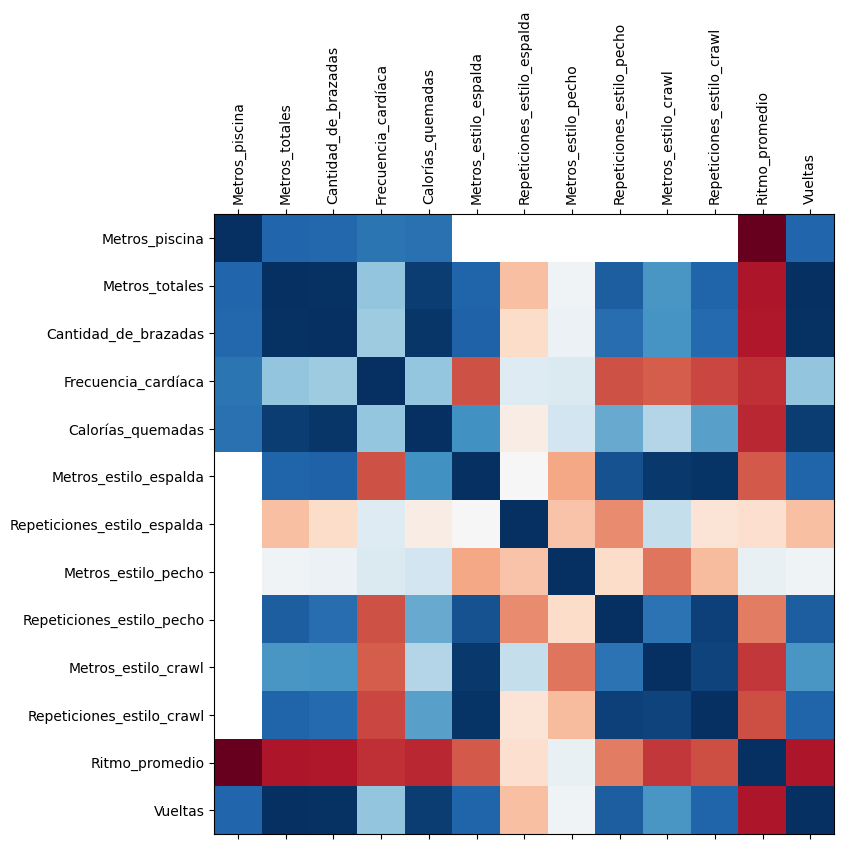

In [40]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [41]:
!pip install seaborn

In [42]:
import seaborn as sns

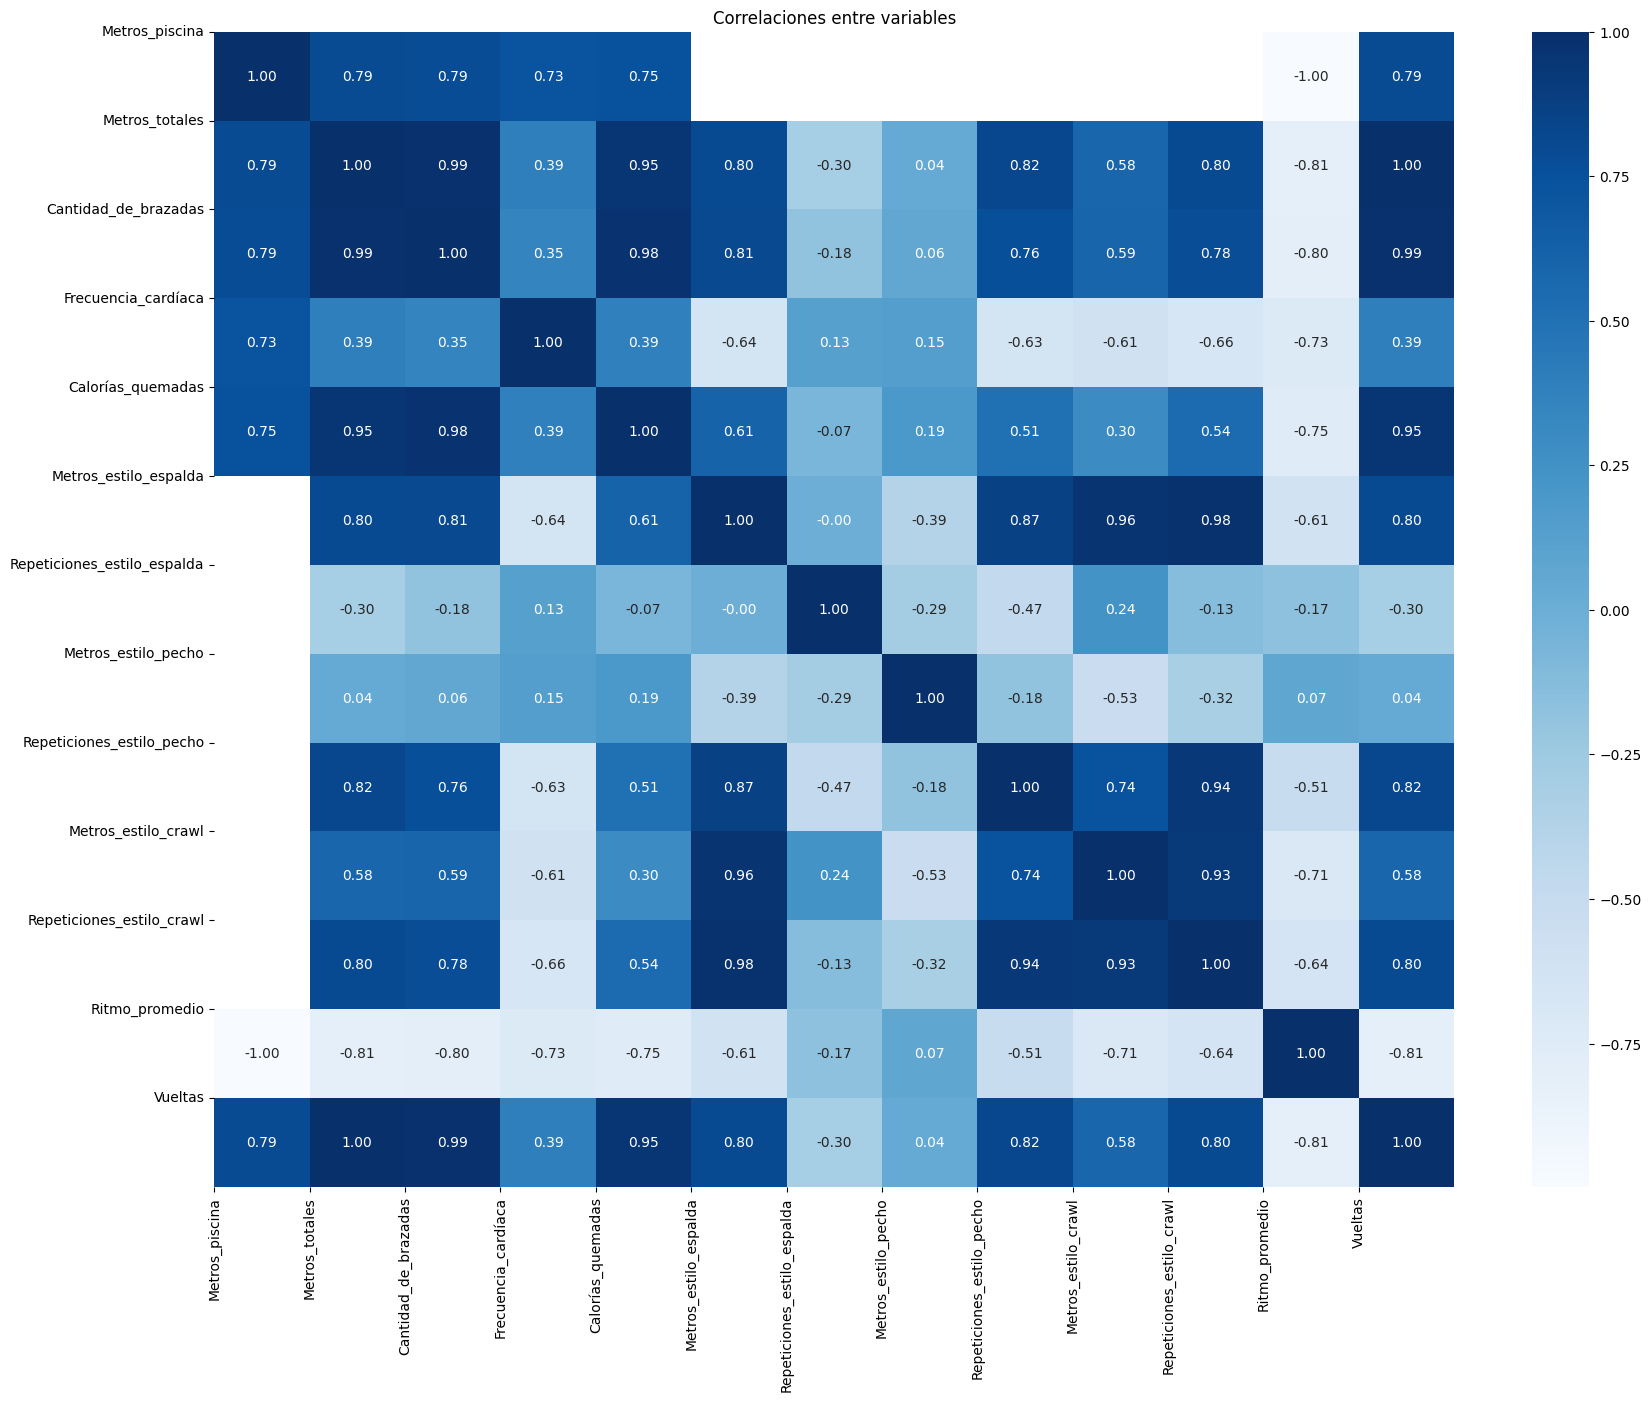

In [43]:
fig = plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlaciones entre variables')
plt.show()

In [44]:
data.head()

,Fecha,Hora_inicio,Hora_de_finalización,Duración_sesion,Tipo_entrenamiento,Objetivos,Metas,Metros_piscina,Metros_totales,Cantidad_de_brazadas,...,Repeticiones_estilo_crawl,Descanso_entre_series,Ritmo_promedio,Vueltas,Tiempo_ingesta_previa,Ingesta_descripcion,Suplemento_dietario,Ejercicios_previos,Tiempo_ejercicios_previos,Sensaciones_entrenamiento
0,2023-01-30,09:05:00,10:05:00,01:01:11,Series,Mejorar Tecnica,Mejorar rendimiento,20,1420,980,...,4.0,00:00:30,4.20,71,01:00:00,"Leche con coco, pan",Creatina,Caminata,00:00:15,Muy buenas
1,2023-01-27,11:04:00,NaN,00:55:18,Estilos,Mejorar Tecnica,Mejorar crawl,20,1420,890,...,4.0,00:00:45,3.54,71,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Muy buenas
2,2023-01-25,08:50:00,09:50:00,01:01:11,Estilos,Mejorar Tecnica,Mejorar crawl,20,1340,818,...,3.0,00:01:00,4.34,67,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas
3,2023-01-23,21:06:00,NaN,00:37:45,Series,Mejorar Tecnica,Aumentar distancia,20,780,506,...,2.0,00:01:30,4.50,39,01:00:00,"Cafe, banana",Creatina,Caminata,00:00:10,Buenas
4,2023-01-20,09:33:00,NaN,00:53:54,Series,Mejorar Tecnica,Incrementar velocidad,20,1100,663,...,2.0,00:01:30,4.54,55,01:00:00,"Cafe, cereales, banana",Creatina,Caminata,00:00:10,Buenas


#### Vamos a analizar tres correlaciones:

 1 - Relación entre la duración de la sesión y la distancia total recorrida, para asegurarme de que estoy dedicando el tiempo adecuado a cada entrenamiento y maximizando la distancia recorrida en cada sesión.

 2 - Relación entre la frecuencia cardíaca y las calorías quemadas, para asegurarme de que estoy alcanzando mi objetivo de quemar calorías y maximizando la eficiencia cardiovascular de mis entrenamientos.

 3 - Relación entre el ritmo promedio y la cantidad de brazadas, para asegurarme de que estoy alcanzando mi objetivo de mejorar mi técnica de natación y maximizar mi rendimiento.

#### 1 - Relación entre la duración de la sesión y la distancia total recorrida

Crear gráfico de dispersión con duración en el eje x y distancia en el eje y

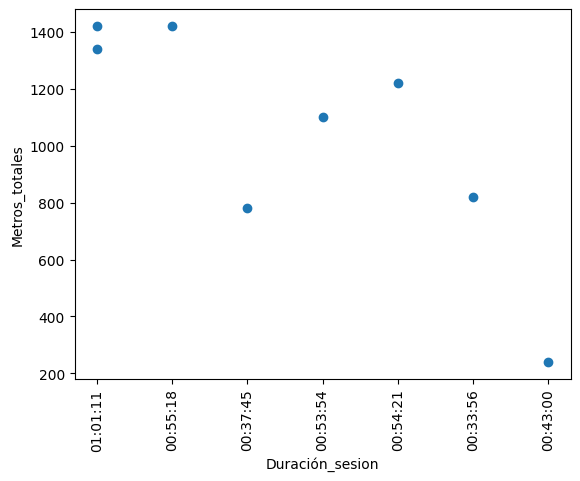

In [46]:
plt.scatter(data['Duración_sesion'], data['Metros_totales'])
plt.xlabel('Duración_sesion')
plt.ylabel('Metros_totales')
plt.xticks(rotation=90)
plt.show()

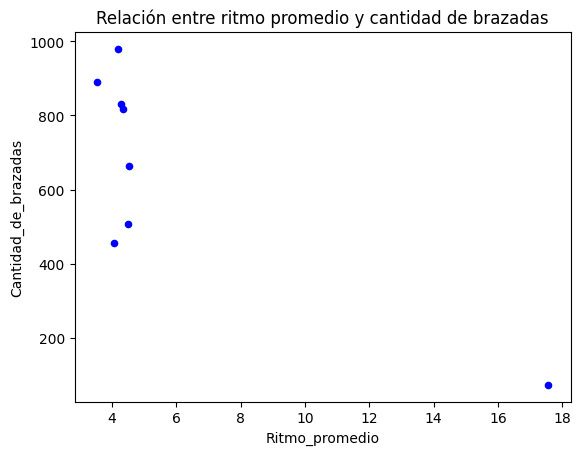

In [47]:
data.plot.scatter(x='Ritmo_promedio', y='Cantidad_de_brazadas', c='blue')
plt.xlabel('Ritmo_promedio')
plt.ylabel('Cantidad_de_brazadas')
plt.title('Relación entre ritmo promedio y cantidad de brazadas')
plt.show()

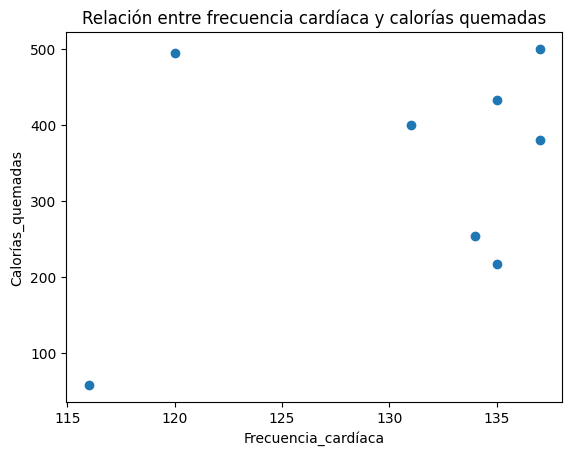

In [48]:
x = data['Frecuencia_cardíaca']
y = data['Calorías_quemadas']

plt.scatter(x, y)
plt.xlabel('Frecuencia_cardíaca')
plt.ylabel('Calorías_quemadas')
plt.title('Relación entre frecuencia cardíaca y calorías quemadas')
plt.show()

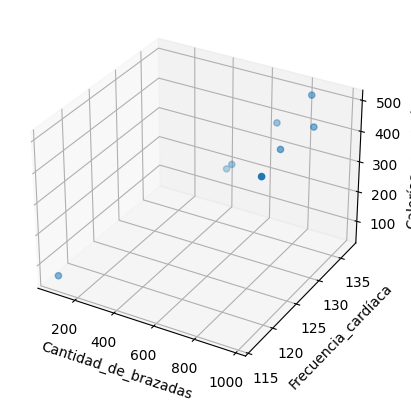

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Cantidad_de_brazadas'], data['Frecuencia_cardíaca'], data['Calorías_quemadas'])
ax.set_xlabel('Cantidad_de_brazadas')
ax.set_ylabel('Frecuencia_cardíaca')
ax.set_zlabel('Calorías_quemadas')
plt.show()

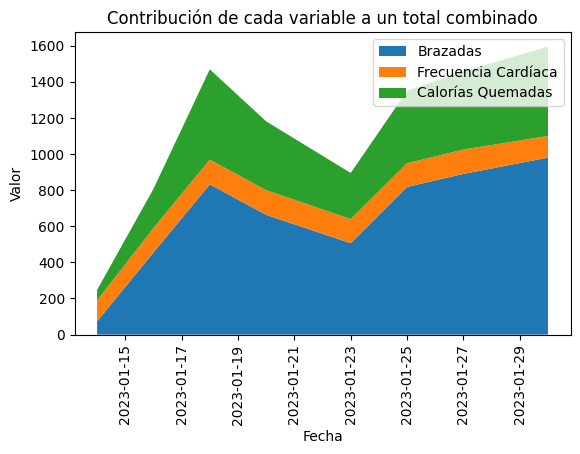

In [50]:
# Crear una lista con las tres variables que queremos comparar
variables = ['Cantidad_de_brazadas', 'Frecuencia_cardíaca', 'Calorías_quemadas']

# Crear una lista con los valores de cada variable para cada sesión de entrenamiento
valores = [data['Cantidad_de_brazadas'], data['Frecuencia_cardíaca'], data['Calorías_quemadas']]

# Crear el gráfico de barras apiladas
plt.stackplot(data['Fecha'], valores, labels=variables)

# Añadir etiquetas al eje x e y y título al gráfico
plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.ylabel('Valor')
plt.legend(['Brazadas', 'Frecuencia Cardíaca', 'Calorías Quemadas'])
plt.title('Contribución de cada variable a un total combinado')

# Mostrar el gráfico
plt.show()

#### En funcion de este DataFrame, podriamos considerar los siguiientes puntos de analisis:

1. La relación entre la cantidad de brazadas y la distancia recorrida (Metros totales): si aumenta la cantidad de brazadas, es probable que aumente la distancia recorrida.

2. La relación entre la frecuencia cardíaca y las calorías quemadas: si aumenta la frecuencia cardíaca, es probable que aumenten las calorías quemadas.

3. La relación entre la duración de la sesión de entrenamiento y la distancia recorrida: si aumenta la duración de la sesión de entrenamiento, es probable que aumente la distancia recorrida.

4. La relación entre la distancia recorrida y el ritmo promedio: si aumenta la distancia recorrida, es probable que disminuya el ritmo promedio.

5. La relación entre la cantidad de brazadas y el ritmo promedio: si aumenta la cantidad de brazadas, es probable que disminuya el ritmo promedio.

6. La relación entre la frecuencia cardíaca y la distancia recorrida: si aumenta la frecuencia cardíaca, es probable que aumente la distancia recorrida.

7. La relación entre la duración de la sesión de entrenamiento y la cantidad de brazadas: si aumenta la duración de la sesión de entrenamiento, es probable que aumente la cantidad de brazadas.

8. La relación entre las calorías quemadas y la distancia recorrida: si aumentan las calorías quemadas, es probable que aumente la distancia recorrida.

9. Es importante notar que esta lista esta basada en una observación de un dataset reducido y no se tiene un analisis mas completo, para poder determinar relaciones mas precisas es necesario contar con un dataset mas grande y realizar un análisis mas exhaustivo.

#### Pistas:

1. Relación entre la duración de la sesión de entrenamiento y la cantidad de metros nadados

2. Impacto del descanso entre series en el rendimiento de los nadadores

3. Relación entre el tipo de entrenamiento (por ejemplo, entrenamiento de fuerza, entrenamiento de resistencia, etc.) con el rendimiento en la piscina

4. Relación entre las metas y objetivos establecidos por el nadador con su rendimiento en la piscina

5. Relación entre el tiempo de descanso y el rendimiento en las diferentes series y estilos de natación

6. Relación entre la frecuencia cardíaca y la cantidad de brazadas durante un entrenamiento y cómo puede ser utilizada esta información para mejorar el rendimiento en la piscina

7. Relación entre el número de metros totales nadados y el número de calorías quemadas

8. Relación entre el tipo de entrenamiento (por ejemplo, entrenamiento de resistencia o velocidad) en el rendimiento y la quema de calorías

9. Relación entre el número de metros nadados en cada estilo y el rendimiento en ese estilo

10. Relación entre la velocidad promedio y el rendimiento y la quema de calorías

11. Estilo de natación que se practica con más frecuencia

12. Estilo de natación que se practica con menos frecuencia

13. Promedio de metros nadados por sesión de entrenamiento

14. Relación entre la cantidad de brazadas y la frecuencia cardíaca durante las sesiones de entrenamiento

15. Cambio en el rendimiento de los nadadores a lo largo del tiempo

16. Relación entre las sensaciones del nadador con su rendimiento

17. Afecto de la duración de una sesión de entrenamiento al rendimiento y a la cantidad de calorías quemadas, y si existe un punto óptimo en cuanto a la duración de una sesión de entrenamiento para lograr los mejores resultados.

<span style="color: blue; font-size: 22px">
    Generacion de informes con pandas
</span>

In [ ]:
!pip install pandas_profiling

In [51]:
from pandas_profiling import ProfileReport

Ejecuta el análisis y genera el informe

In [52]:
reporte = ProfileReport(data, title="Analisis Performance en Piscina de 20 mts")

In [53]:
descripcion = reporte.get_description()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


In [ ]:
for key, value in descripcion.items():
    print(f"{key}: {value}")

In [55]:
reporte.to_notebook_iframe()

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reporte.to_file(output_file="/home/studio-lab-user/Swimming Data Analysis/Data/Analisis Performance en Piscina de 20 mts.html")

<span style="color: red; font-size: 14px">
    NOTA: Si luego de realizar operaciones de limpieza sonbre el dataFrame se desea exportarlo para ser utilizado en otro modulo, entonces se recomienda ejecutar el siguiente codigo:
</span>

In [9]:
data.to_excel(r'/home/studio-lab-user/Swimming Data Analysis/Data/Clean_data/clean_data.xlsx', index=False)